# Setting

In [1]:
from pf_utils import BacktestManager

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Implement

### class

### test

# Universe

In [2]:
import FinanceDataReader as fdr
import pandas as pd
#import warnings

#warnings.filterwarnings(action='ignore', category=FutureWarning)

In [3]:
path_data = 'data'

In [4]:
#stocks = fdr.StockListing('KOSPI-DESC') # KOSPI
#stocks = fdr.StockListing('KOSPI') # 종목수는 2022년 10월 25일 기준?
#etfs = fdr.StockListing('ETF/KR') # 한국 ETF 전종목
tickers_200 = fdr.SnapDataReader('KRX/INDEX/STOCK/1028') # 코스피 200

In [5]:
%%time
#tickers = tickers_200.Code
#df_200 = fdr.DataReader(tickers, '2021')

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 5.01 μs


In [6]:
#file = 'df_200.csv'
#df_200.to_csv(f'{path_data}/{file}')

In [7]:
file = 'df_200.csv'
df_200 = pd.read_csv(f'{path_data}/{file}', parse_dates=[0], index_col=[0])

In [8]:
df_200.tail()

,051600,001040,001440,316140,004800,028260,192080,383220,036460,185750,...,011170,004020,012750,032830,003620,039130,105560,021240,192820,009420
Date,,,,,,,,,,,,,,,,,,,,,
2024-06-19,37200,124800,15700,14140,57300,135400,44500,65100.0,55800,100400,...,112300,28950,58700,87400,5340,57000,78900,55200,187100,33000
2024-06-20,36900,122600,15610,14360,57200,135100,45700,64400.0,63500,101600,...,120500,29350,59500,87600,5310,57400,80800,55900,180000,33000
2024-06-21,37200,125500,16240,14240,57800,135300,45400,63000.0,61900,94600,...,115000,29600,57600,87000,5250,59600,78600,58200,187000,33350
2024-06-24,37300,117000,15680,14490,57200,135900,45750,62200.0,63500,95800,...,115000,28950,56800,87000,5170,58500,80000,58000,184100,32300
2024-06-25,37200,117500,15800,14580,57200,135400,47050,62800.0,62000,96600,...,117400,29200,57600,87800,5210,59000,79900,59700,186700,32600


# BacktestManager

## create class

In [9]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [10]:
bm.util_check_days_in_year().agg(['mean', 'min', 'max'])

mean    246.0
min     246.0
max     246.0
dtype: float64

## define strategy by keywords

In [11]:
kwargs_build = dict(
    name = 'strategy1',
    freq = 'M', select = 'Momentum', weigh = 'ERC',
    n_equities=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

In [12]:
kwargs_build = dict(
    name = 'strategy2',
    freq = 'M', select = 'Momentum', weigh = 'equally',
    n_equities=5, lookback=12, lag=0
)
bm.build(**kwargs_build)

*you could use build_batch instead*

In [13]:
kwargs_build = dict(
    freq = 'M', select = 'Momentum',
    n_equities=5, lookback=12, lag=0
)
kwa_list = [
    {'name':'strategy1', 'weigh':'ERC'},
    {'name':'strategy2', 'weigh':'equally'}
]
bm.build_batch(*kwa_list, **kwargs_build)

## buy and hold

In [14]:
bm.buy_n_hold('buy&hold', weights='005930')

RunOnce selected


## baseline

In [15]:
name='KOSPI' 
ticker = '069500'

start = df_200.index[0].strftime('%Y-%m-%d')
end = df_200.index[-1].strftime('%Y-%m-%d')
df_baseline = fdr.DataReader(ticker, start, end)
df_baseline = df_baseline.Close.rename(name)

bm.benchmark(df_baseline, name=name)

RunOnce selected


## run backtest

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.65it/s]


Returning stats


,strategy1,strategy2,buy&hold,KOSPI
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,4.159986,4.075378,-0.0276,0.014736
cagr,0.603681,0.596068,-0.008023,0.004219
calmar,2.399682,2.328676,-0.019083,0.012322
max_drawdown,-0.251567,-0.255969,-0.420438,-0.342432
avg_drawdown,-0.070941,-0.073001,-0.22031,-0.08767
avg_drawdown_days,24.59375,25.419355,631.0,209.0
daily_vol,0.397385,0.406179,0.225217,0.17231
daily_sharpe,1.411728,1.377729,0.075251,0.110941


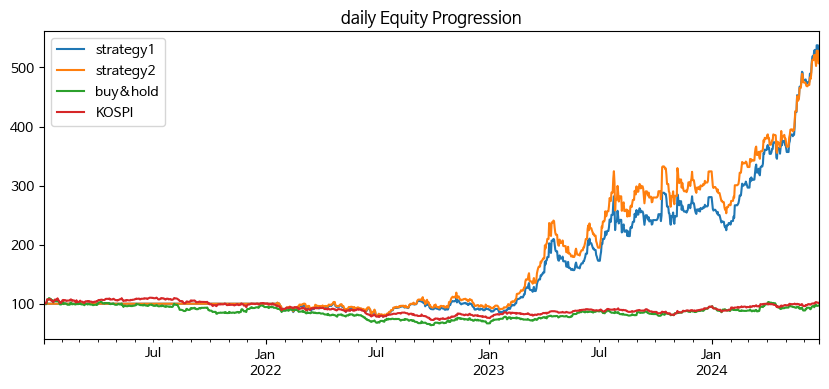

In [16]:
bm.run(figsize=(10,4))

## define strategy for debugging or more combinations

In [17]:
import bt

name='WeighERC does not work with SelectRandomly'

algos = [
    bt.algos.SelectAll(),

    bt.algos.SelectRandomly(n=5),
    #bt.algos.SelectMomentum(n=5, lookback=pd.DateOffset(months=12)),
    
    bt.algos.RunMonthly(),

    #bt.algos.SelectHasData(lookback=pd.DateOffset(months=12)),
    bt.algos.WeighERC(lookback=pd.DateOffset(months=12)),
    #bt.algos.WeighEqually(),
    
    bt.algos.Rebalance()
]

bm4d = BacktestManager(df_200, **kwargs_bm)
bm4d.build(name=name, algos=algos)
_ = bm4d.run(figsize=(10,4))

15 equities removed for shorter periods (7.5%)


  0%|                                                                         | 0/1 [00:00<?, ?it/s]

ERROR: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by LedoitWolf.


## Post-processing

In [18]:
bm.get_stats(sort_by='monthly_sharpe')

,strategy1,strategy2,KOSPI,buy&hold
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,4.159986,4.075378,0.014736,-0.0276
cagr,0.603681,0.596068,0.004219,-0.008023
calmar,2.399682,2.328676,0.012322,-0.019083
max_drawdown,-0.251567,-0.255969,-0.342432,-0.420438
avg_drawdown,-0.070941,-0.073001,-0.08767,-0.22031
avg_drawdown_days,24.59375,25.419355,209.0,631.0
daily_vol,0.397385,0.406179,0.17231,0.225217
daily_sharpe,1.411728,1.377729,0.110941,0.075251


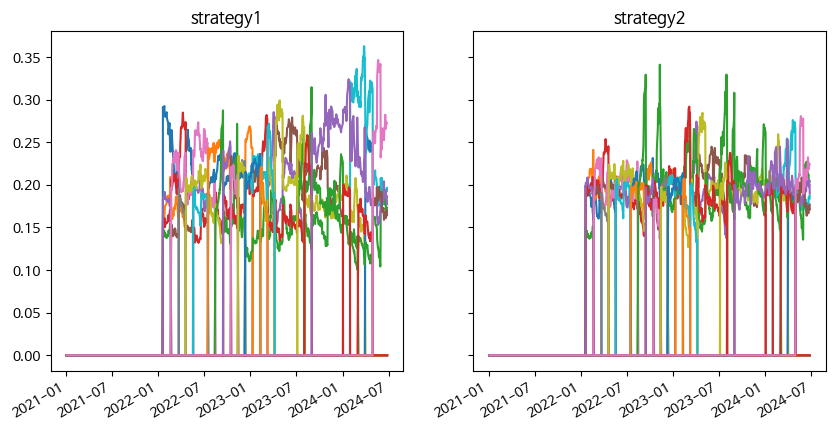

In [19]:
pf = ['strategy1', 'strategy2']
bm.plot_security_weights(pf, legend=False)

In [20]:
bm.get_historical(pf).tail()

,strategy1,strategy2
2024-06-19,518.52411,510.90581
2024-06-20,509.08811,502.57181
2024-06-21,537.62411,528.36981
2024-06-24,515.28011,506.98581
2024-06-25,515.99861,507.53781


In [21]:
bm.get_transactions(pf[1]).tail(10)

strategy2: transactions returned


price  quantity
Date       Security                    
2024-04-30 022100     40750.0      26.0
           042700    135000.0       2.0
           047050     46300.0    -145.0
           079550    160800.0     -43.0
           267260    247000.0     -12.0
2024-05-31 003230    529000.0      -8.0
           010120    213500.0       2.0
           022100     35350.0      82.0
           042700    161700.0       2.0
           267260    301000.0       1.0

In [22]:
bm.get_security_weights(pf[1], stack=True)

strategy2: weights at transactions returned


Date              
2022-01-19  138040    0.199290
            052690    0.194220
            298050    0.150300
            066970    0.194100
            005070    0.199934
                        ...   
2024-05-31  267260    0.196591
            022100    0.199600
            042700    0.197594
            010120    0.197919
            003230    0.189470
Length: 150, dtype: float64

# Momentum

### Casestudy

In [ ]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)

#### Lookback

In [17]:
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [19]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_equities = 5,
    #lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} month lookback', 'lookback':x} for x in [3, 6, 12, 24]]

bm.build_batch(*kwa_list, **kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.09s/it]

Returning stats


,3 month lookback,6 month lookback,12 month lookback,24 month lookback
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,1.928509,1.85508,4.159986,4.726005
cagr,0.362425,0.352503,0.603681,0.652451
calmar,0.73394,0.992341,2.399682,2.371185
max_drawdown,-0.493807,-0.355224,-0.251567,-0.275158
avg_drawdown,-0.109668,-0.114444,-0.070941,-0.063138
avg_drawdown_days,68.625,63.5625,24.59375,15.5
daily_vol,0.414257,0.385303,0.397385,0.358799
daily_sharpe,0.967859,0.992593,1.411728,1.607177


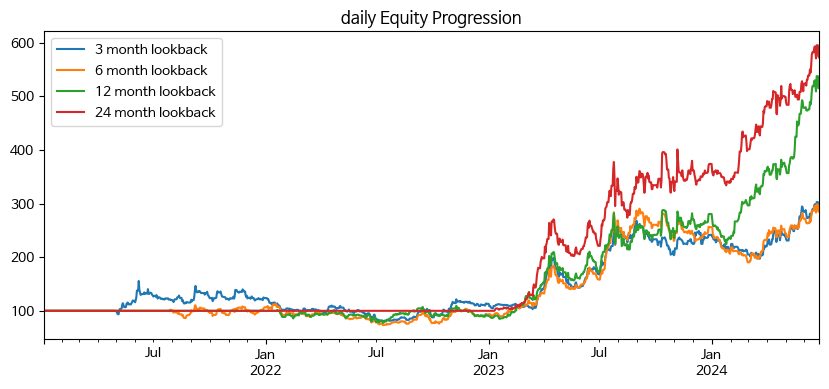

In [20]:
bm.run(figsize=(10,4))

#### Lag

In [28]:
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [29]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    n_equities = 5,
    lookback = 12,
    #lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} day lag', 'lag':x} for x in [0, 5, 10, 20]]

bm.build_batch(*kwa_list, **kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 4/4 [00:04<00:00,  1.07s/it]

Returning stats


,0 day lag,5 day lag,10 day lag,20 day lag
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,4.159986,5.700245,5.757333,3.746824
cagr,0.603681,0.728899,0.733126,0.565618
calmar,2.399682,2.773054,2.656831,1.946251
max_drawdown,-0.251567,-0.262851,-0.27594,-0.290619
avg_drawdown,-0.070941,-0.058276,-0.058505,-0.057472
avg_drawdown_days,24.59375,17.139535,19.0,24.966667
daily_vol,0.397385,0.391256,0.38785,0.376288
daily_sharpe,1.411728,1.624569,1.641999,1.404398


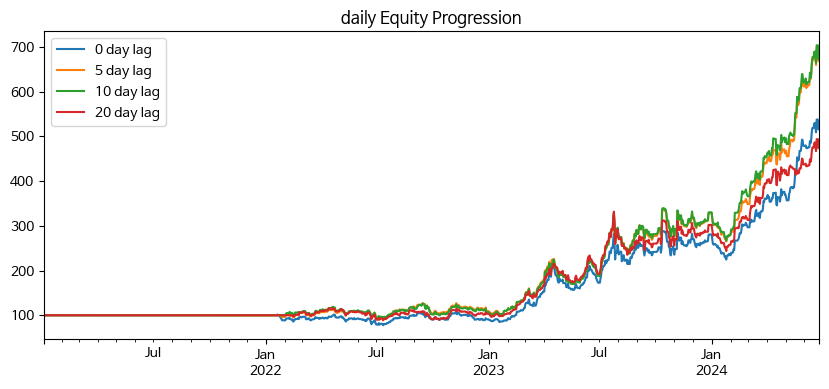

In [30]:
bm.run(figsize=(10,4))

#### Number of equities

In [31]:
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [32]:
kwargs_build = dict(
    select = 'Momentum', weigh = 'ERC',
    #n_equities = 5,
    lookback = 12,
    lag = 0,
    freq='M'
)

kwa_list = [{'name':f'{x} equities', 'n_equities':x} for x in [2, 5, 10]]

bm.build_batch(*kwa_list, **kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 3/3 [00:03<00:00,  1.08s/it]

Returning stats


,2 equities,5 equities,10 equities
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,7.527593,4.159986,2.102112
cagr,0.85317,0.603681,0.385196
calmar,1.873354,2.399682,1.775096
max_drawdown,-0.455424,-0.251567,-0.217
avg_drawdown,-0.13879,-0.070941,-0.057281
avg_drawdown_days,38.285714,24.59375,38.047619
daily_vol,0.540589,0.397385,0.286789
daily_sharpe,1.432556,1.411728,1.30467


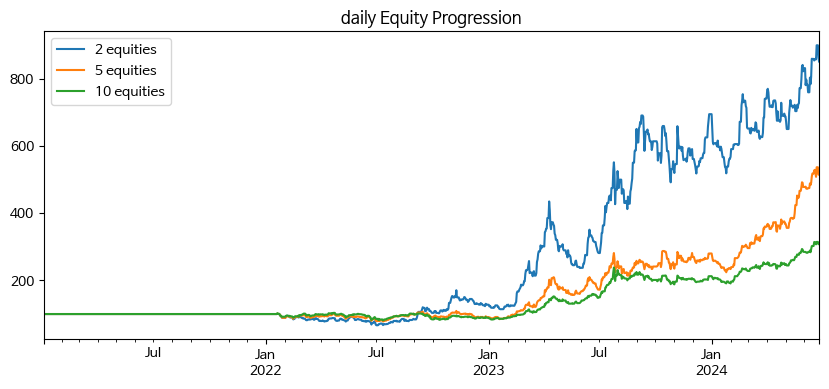

In [33]:
bm.run(figsize=(10,4))

#### Weighting

In [35]:
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [36]:
kwargs_build = dict(
    select = 'Momentum', 
    freq='M', n_equities=5, lookback=12, lag=0
)
kwa_list = [{'name':x, 'weigh':x} for x in ['ERC', 'InvVol']]
bm.build_batch(*kwa_list, **kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 2/2 [00:02<00:00,  1.10s/it]

Returning stats


,ERC,InvVol
start,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,4.159986,3.718961
cagr,0.603681,0.562967
calmar,2.399682,2.234985
max_drawdown,-0.251567,-0.251889
avg_drawdown,-0.070941,-0.069153
avg_drawdown_days,24.59375,25.548387
daily_vol,0.397385,0.396771
daily_sharpe,1.411728,1.346735


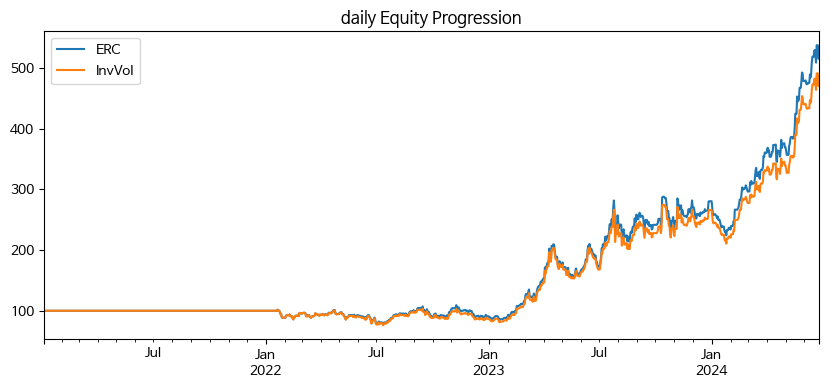

In [37]:
bm.run(figsize=(10,4))

## K-ratio

In [38]:
kwargs_bm = dict(
    initial_capital = 10000000,
    commissions = 0,
    align_axis = 1, 
    days_in_year = 246
)
bm = BacktestManager(df_200, **kwargs_bm)

15 equities removed for shorter periods (7.5%)


In [40]:
kwargs_build = dict(
    select = 'K-ratio', weigh = 'ERC',
    freq='M', n_equities=5, lag=0
)
kwa_list = [{'name':f'K-ratio: lookback {x}M', 'lookback':x} for x in [3, 6, 12]]

bm.build_batch(*kwa_list, **kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 3/3 [03:28<00:00, 69.37s/it]

Returning stats
CPU times: user 3min 28s, sys: 79.2 ms, total: 3min 28s
Wall time: 3min 28s


,K-ratio: lookback 3M,K-ratio: lookback 6M,K-ratio: lookback 12M
start,2021-01-03 00:00:00,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,-0.32677,0.363782,1.674487
cagr,-0.107638,0.09341,0.327304
calmar,-0.22473,0.320409,1.564196
max_drawdown,-0.478965,-0.291533,-0.209248
avg_drawdown,-0.25223,-0.084577,-0.037732
avg_drawdown_days,572.5,113.0,25.483871
daily_vol,0.235472,0.224002,0.241985
daily_sharpe,-0.376295,0.519062,1.316548


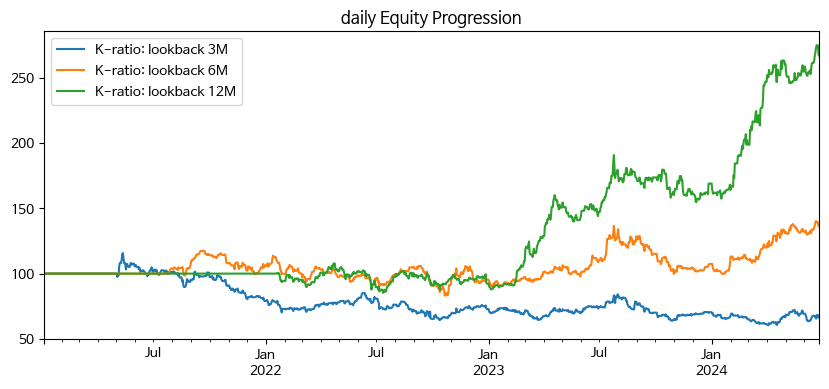

In [41]:
%%time
bm.run(figsize=(10,4))

In [42]:
kwargs_build = dict(
    name='Simple', select = 'Momentum', weigh = 'ERC',
    freq='M', n_equities=5, lookback=12
)
bm.build(**kwargs_build)

100%|█████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]

Returning stats


,K-ratio: lookback 12M,Simple
start,2021-01-03 00:00:00,2021-01-03 00:00:00
end,2024-06-25 00:00:00,2024-06-25 00:00:00
total_return,1.674487,4.159986
cagr,0.327304,0.603681
calmar,1.564196,2.399682
max_drawdown,-0.209248,-0.251567
avg_drawdown,-0.037732,-0.070941
avg_drawdown_days,25.483871,24.59375
daily_vol,0.241985,0.397385
daily_sharpe,1.316548,1.411728


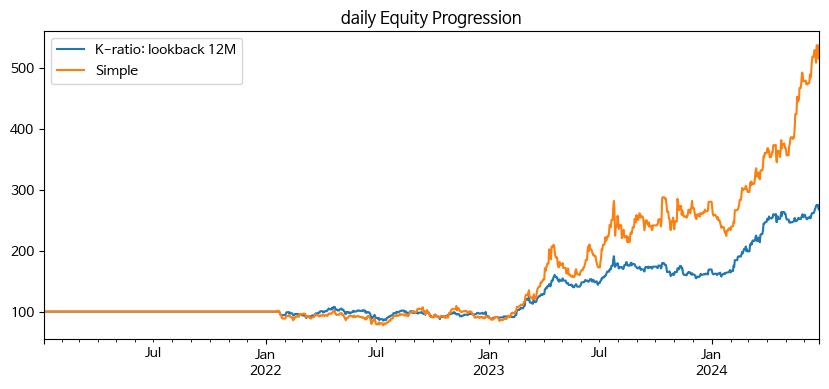

In [43]:
pf_list = ['Simple', 'K-ratio: lookback 12M']
bm.run(pf_list, figsize=(10,4))